<a href="https://colab.research.google.com/github/rodmart21/Sports_analytics/blob/main/mapaPases_stream.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install mplsoccer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.4/79.4 kB 1.6 MB/s eta 0:00:00


In [2]:
pip install statsbombpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.5 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
from urllib.request import urlopen
from mplsoccer import Pitch, FontManager, VerticalPitch, add_image
from PIL import Image
from statsbombpy import sb

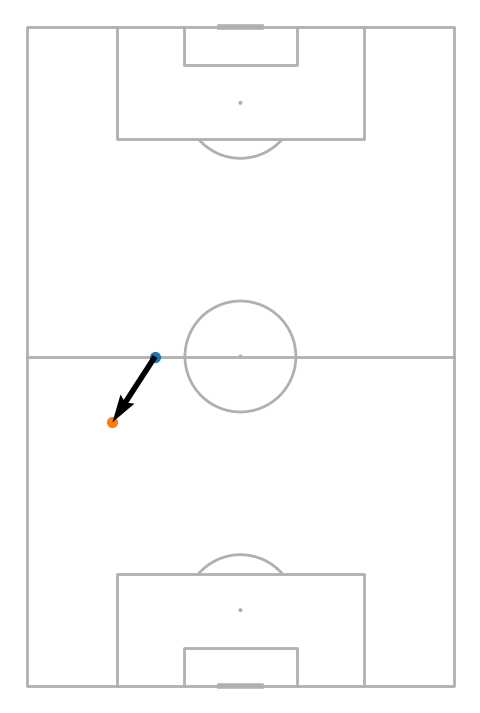

In [4]:
fig ,ax = plt.subplots(figsize=(16,9))
pitch = VerticalPitch(pitch_type='opta')

pitch.draw(ax=ax)

pitch.scatter(50,70,ax=ax,s=50)
pitch.scatter(40,80,ax=ax,s=50)

pitch.arrows(50,70,40,80,ax=ax)

In [5]:
sb.competitions()   # Ves detalles de todas las competiciones que están ahí contenidas

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-12-12T07:43:33.436182,None,None,2023-12-12T07:43:33.436182
1,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-02-14T05:41:27.566989,None,None,2024-02-14T05:41:27.566989
2,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
3,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
4,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
...,...,...,...,...,...,...,...,...,...,...,...,...
66,55,43,Europe,UEFA Euro,male,False,True,2020,2023-02-24T21:26:47.128979,2023-04-27T22:38:34.970148,2023-04-27T22:38:34.970148,2023-02-24T21:26:47.128979
67,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2023-06-18T19:28:39.443883,2021-06-13T16:17:31.694,None,2023-06-18T19:28:39.443883
68,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2023-10-24T03:36:54.066267,2023-10-24T03:37:29.085948,2023-10-24T03:37:29.085948,2023-10-24T03:36:54.066267
69,72,107,International,Women's World Cup,female,False,True,2023,2023-12-12T14:06:50.626363,2023-12-12T14:12:41.561162,2023-12-12T14:12:41.561162,2023-12-12T14:06:50.626363


In [6]:
partido = sb.events(match_id=3869685)   # Dentro de statsbomb puedes buscar un ID de partido concreto que te interese. Statsbomb es una API.

In [7]:
partido.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_other', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id'

In [8]:
partido.head()

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Argentina,779,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",France,771,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,France,771,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,France,771,00:00:00.000,Half Start,NaN


In [9]:
partido.pass_outcome.value_counts()  # Vemos el tipo de resultados que obtienen nuestros pases.

pass_outcome
Incomplete      232
Out              20
Unknown          10
Pass Offside      7
Name: count, dtype: int64

In [10]:
partido.shape

(4407, 94)

In [11]:
partido[['x', 'y']] = partido['location'].apply(pd.Series)
partido[['end_x', 'end_y']] = partido['pass_end_location'].apply(pd.Series)

In [12]:
partido['pasador'] = partido['player']
partido['receptor'] = partido['player'].shift(-1)
partido['player'].shift(-1)

0                            NaN
1                            NaN
2                            NaN
3                            NaN
4                            NaN
                  ...           
4402                         NaN
4403                         NaN
4404              Olivier Giroud
4405    Damián Emiliano Martínez
4406                        None
Name: player, Length: 4407, dtype: object

In [13]:
pases_partido = partido[(partido['type'] == 'Pass') & (partido['team'] == 'Argentina')]
pases_partido.shape

(693, 100)

In [14]:
pases_partido.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_other', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id'

In [15]:
pases_partido.pass_outcome.value_counts()

pass_outcome
Incomplete      112
Out              12
Unknown           6
Pass Offside      3
Name: count, dtype: int64

In [16]:
completados = pases_partido[pases_partido['pass_outcome'].isna() == True]    # O sea se asume que los pases que tienen la columna de outcome vacía,
                                                                              # son los que se consideran completados.

In [17]:
completados.shape

(560, 100)

In [18]:
completados[['player', 'location', 'pass_end_location']]

,player,location,pass_end_location
14,Nahuel Molina Lucero,"[22.7, 80.0]","[36.0, 75.2]"
15,Rodrigo Javier De Paul,"[41.1, 73.9]","[23.2, 62.8]"
16,Cristian Gabriel Romero,"[24.7, 59.4]","[21.5, 32.2]"
17,Nicolás Hernán Otamendi,"[24.0, 27.1]","[21.7, 49.3]"
18,Cristian Gabriel Romero,"[22.1, 49.8]","[24.0, 27.3]"
...,...,...,...
1267,Paulo Bruno Exequiel Dybala,"[44.3, 48.3]","[42.8, 54.1]"
1268,Enzo Fernandez,"[42.8, 54.1]","[58.0, 62.4]"
1269,Lionel Andrés Messi Cuccittini,"[66.8, 62.6]","[104.9, 62.6]"
1270,Gonzalo Ariel Montiel,"[109.3, 61.6]","[110.8, 41.6]"


In [19]:
completados[['player', 'x', 'y', 'end_x', 'end_y']]

,player,x,y,end_x,end_y
14,Nahuel Molina Lucero,22.7,80.0,36.0,75.2
15,Rodrigo Javier De Paul,41.1,73.9,23.2,62.8
16,Cristian Gabriel Romero,24.7,59.4,21.5,32.2
17,Nicolás Hernán Otamendi,24.0,27.1,21.7,49.3
18,Cristian Gabriel Romero,22.1,49.8,24.0,27.3
...,...,...,...,...,...
1267,Paulo Bruno Exequiel Dybala,44.3,48.3,42.8,54.1
1268,Enzo Fernandez,42.8,54.1,58.0,62.4
1269,Lionel Andrés Messi Cuccittini,66.8,62.6,104.9,62.6
1270,Gonzalo Ariel Montiel,109.3,61.6,110.8,41.6


In [20]:
completados.groupby('player')[['x','y']].mean()   # Así está bien escrito. Estaba escrito con el mean() por delante.

,x,y
player,,
Alexis Mac Allister,68.148889,26.637778
Cristian Gabriel Romero,33.871667,52.686667
Damián Emiliano Martínez,11.433333,42.155556
Enzo Fernandez,55.150633,43.230380
Germán Alejandro Pezzella,53.300000,31.000000
Gonzalo Ariel Montiel,72.262500,71.350000
Julián Álvarez,77.707692,34.746154
Lautaro Javier Martínez,86.260000,37.400000
Leandro Daniel Paredes,54.293333,39.253333


In [21]:
## No tenemos la columna con el receptor del pase. Hacemos un shift a la columna de player de forma que nos sube uno para arriba y así tenemos el que recibió el pase.
partido['pasador']=partido['player']
partido['receptor']=partido['player'].shift(-1)

In [22]:
completados[['pasador', 'receptor']]

,pasador,receptor
14,Nahuel Molina Lucero,Rodrigo Javier De Paul
15,Rodrigo Javier De Paul,Cristian Gabriel Romero
16,Cristian Gabriel Romero,Nicolás Hernán Otamendi
17,Nicolás Hernán Otamendi,Cristian Gabriel Romero
18,Cristian Gabriel Romero,Nicolás Hernán Otamendi
...,...,...
1267,Paulo Bruno Exequiel Dybala,Enzo Fernandez
1268,Enzo Fernandez,Lionel Andrés Messi Cuccittini
1269,Lionel Andrés Messi Cuccittini,Gonzalo Ariel Montiel
1270,Gonzalo Ariel Montiel,Hugo Lloris


In [23]:
# Mapa de pases hasta el primer cambio, para que no haya más de 11 jugadores en el campo
firstSub = partido[(partido['type'] == 'Substitution') & (partido['team'] == 'Argentina')].minute.min()
firstSub

63

In [24]:
completados = completados[completados['minute'] < firstSub]  # Antes de la sustitución, para que haya 11 jugadores.

In [42]:
completados.groupby(['player','receptor']).id.count().head(10)   # Agrupamos y vemos quién dio pases a quién y cuántas veces

player                   receptor                       
Alexis Mac Allister      Enzo Fernandez                     6
                         Julián Álvarez                     1
                         Lionel Andrés Messi Cuccittini     4
                         Nicolás Alejandro Tagliafico       4
                         Nicolás Hernán Otamendi            1
                         Olivier Giroud                     1
                         Ousmane Dembélé                    1
                         Randal Kolo Muani                  1
                         Ángel Fabián Di María Hernández    5
Cristian Gabriel Romero  Alexis Mac Allister                1
Name: id, dtype: int64

In [43]:
# Utilizas las funciones mean y count para calcular la media en la posición y las veces que toca la pelota.
average_locations = completados.groupby('player').agg({'x': ['mean'], 'y': ['mean', 'count']})
average_locations.columns = ['x', 'y', 'count']
average_locations

,x,y,count
player,,,
Alexis Mac Allister,68.737500,23.845833,24
Cristian Gabriel Romero,33.905128,53.346154,39
Damián Emiliano Martínez,12.641667,43.966667,12
Enzo Fernandez,56.135000,36.532500,40
Julián Álvarez,76.346154,37.538462,13
Lionel Andrés Messi Cuccittini,71.588889,51.096296,27
Nahuel Molina Lucero,59.414286,72.085714,28
Nicolás Alejandro Tagliafico,58.567857,7.335714,28
Nicolás Hernán Otamendi,38.279545,23.350000,44


In [26]:
pass_between = completados.groupby(['pasador', 'receptor']).id.count().reset_index()
pass_between.rename({'id': 'pass_count'}, axis='columns',inplace=True)

In [30]:
# Estableces la relación entre todos los jugadores con los posiciones x-y aproximadas en las que se inicia y acaba su conexión.
# Entiendo que viene de que ha hecho un mean en los posiciones para los pases.
# Así podemos crear los nodos y las flechitas para cada jugador.

pass_between = pass_between.merge(average_locations, left_on='pasador', right_index=True)
pass_between = pass_between.merge(average_locations, left_on='receptor', right_index=True, suffixes=['','_end'])
pass_between

,pasador,receptor,pass_count,x,y,count,x_end,y_end,count_end
0,Alexis Mac Allister,Enzo Fernandez,6,68.737500,23.845833,24,56.135000,36.532500,40
12,Cristian Gabriel Romero,Enzo Fernandez,7,33.905128,53.346154,39,56.135000,36.532500,40
20,Damián Emiliano Martínez,Enzo Fernandez,1,12.641667,43.966667,12,56.135000,36.532500,40
27,Enzo Fernandez,Enzo Fernandez,1,56.135000,36.532500,40,56.135000,36.532500,40
36,Julián Álvarez,Enzo Fernandez,3,76.346154,37.538462,13,56.135000,36.532500,40
...,...,...,...,...,...,...,...,...,...
26,Enzo Fernandez,Cristian Gabriel Romero,6,56.135000,36.532500,40,33.905128,53.346154,39
43,Lionel Andrés Messi Cuccittini,Cristian Gabriel Romero,1,71.588889,51.096296,27,33.905128,53.346154,39
51,Nahuel Molina Lucero,Cristian Gabriel Romero,1,59.414286,72.085714,28,33.905128,53.346154,39
66,Nicolás Hernán Otamendi,Cristian Gabriel Romero,12,38.279545,23.350000,44,33.905128,53.346154,39


## Incluimos un threshold para las veces que deben haber conectado al menos dos jugadores.

In [45]:
pass_between = pass_between[pass_between['pass_count'] > 1]
pass_between.head(3)

,pasador,receptor,pass_count,x,y,count,x_end,y_end,count_end,width
0,Alexis Mac Allister,Enzo Fernandez,6,68.737500,23.845833,24,56.135,36.5325,40,6.0
12,Cristian Gabriel Romero,Enzo Fernandez,7,33.905128,53.346154,39,56.135,36.5325,40,7.0
36,Julián Álvarez,Enzo Fernandez,3,76.346154,37.538462,13,56.135,36.5325,40,3.0


In [46]:
pass_between.pass_count.max()

13

## Estableces una width para las líneas en función de cada conexión dividido entre el número máximo de veces que han conectado dos jugadores.

In [48]:
to_rgba('yellow')   # Te da un array que describe el color

(1.0, 1.0, 0.0, 1.0)

In [49]:
MAX_LINE_WIDTH = 13
pass_between['width'] = (pass_between.pass_count / pass_between.pass_count.max() * MAX_LINE_WIDTH)

MIN_TRANSPARENCY = 0.000001
color = np.array(to_rgba('yellow'))
color = np.tile(color, (len(pass_between), 1))  # Extiendes ese array de color hasta la len necesaria.
c_transparency = pass_between.pass_count / pass_between.pass_count.max()        # Nos da la trasparencia de la línea.
c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
color[:, 3] = c_transparency

MAX_MARKER_SIZE=800
average_locations['marker_size'] = (average_locations['count'] / average_locations['count'].max() * MAX_MARKER_SIZE)

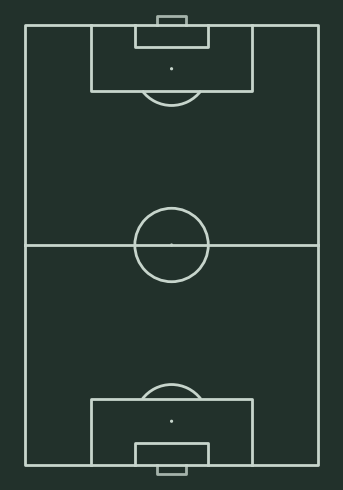

In [51]:
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc', goal_type='box', goal_alpha=.8)
fig, ax = pitch.draw(figsize=(7,5), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')

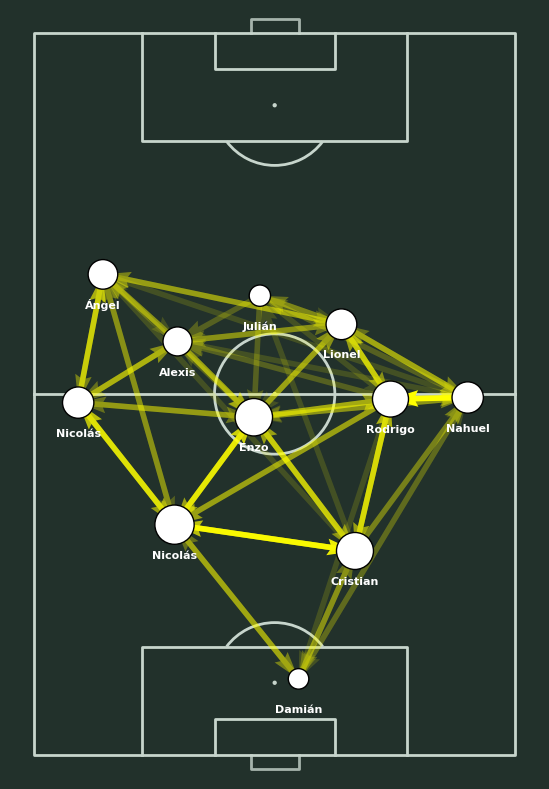

In [56]:
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc', goal_type='box', goal_alpha=.8)
fig, ax = pitch.draw(figsize=(10,8), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')

# Aquí creas simplemente las flechas que unen los pases.
arrows = pitch.arrows(pass_between.x, pass_between.y, pass_between.x_end, pass_between.y_end, ax=ax, color=color, zorder=.99)

# These are the nodes that put the arrows together.
nodes = pitch.scatter(average_locations.x, average_locations.y, ax=ax, color='white', ec='black', s=average_locations['marker_size'])

# index,row + .iterrows(): nos permite iterar en todas las filas del dataframe.
for index, row in pass_between[['pasador', 'x', 'y']].drop_duplicates(subset='pasador').iterrows():
    pitch.annotate(row.pasador.split(' ')[0], xy=(row.x-5, row.y), c='white', va='center',      # Pitch annotate te permite escribir los nombres en los sitios que deseas.
                       ha='center', size=8, weight='bold', ax=ax,zorder=1)


In [ ]:
for index, row in pass_between[['pasador', 'x', 'y']].drop_duplicates(subset='pasador').iterrows():
    print(row.pasador.split(' ')[-1])

Allister
Romero
Álvarez
Cuccittini
Lucero
Tagliafico
Otamendi
Paul
Hernández
Fernandez
Martínez
